### **<p align="center"> 🍂 Bootcamp-SenderoVerde 🍂</p>**

##🍂 Dataset 🍂

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/BootCamp/data_shaffled_8_04_2021-20220604T212737Z-001.zip' -d "/content/"

Archive:  /content/drive/MyDrive/BootCamp/data_shaffled_8_04_2021-20220604T212737Z-001.zip
  inflating: /content/data_shaffled_8_04_2021/masks/133.png  
  inflating: /content/data_shaffled_8_04_2021/masks/100_IvanoFrank.png  
  inflating: /content/data_shaffled_8_04_2021/masks/146_IvanoFrank.png  
  inflating: /content/data_shaffled_8_04_2021/masks/299_Balak.png  
  inflating: /content/data_shaffled_8_04_2021/masks/4.png  
  inflating: /content/data_shaffled_8_04_2021/masks/112.png  
  inflating: /content/data_shaffled_8_04_2021/masks/58_Jovtneve.png  
  inflating: /content/data_shaffled_8_04_2021/masks/2.png  
  inflating: /content/data_shaffled_8_04_2021/masks/170.png  
  inflating: /content/data_shaffled_8_04_2021/masks/39.png  
  inflating: /content/data_shaffled_8_04_2021/masks/161.png  
  inflating: /content/data_shaffled_8_04_2021/masks/154.png  
  inflating: /content/data_shaffled_8_04_2021/masks/109_Balak.png  
  inflating: /content/data_shaffled_8_04_2021/masks/177.png  
  in

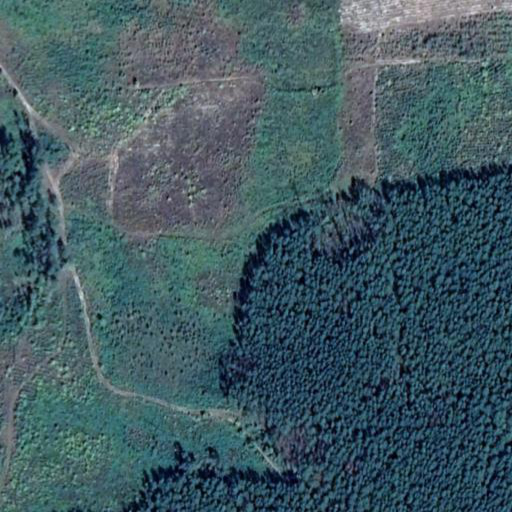

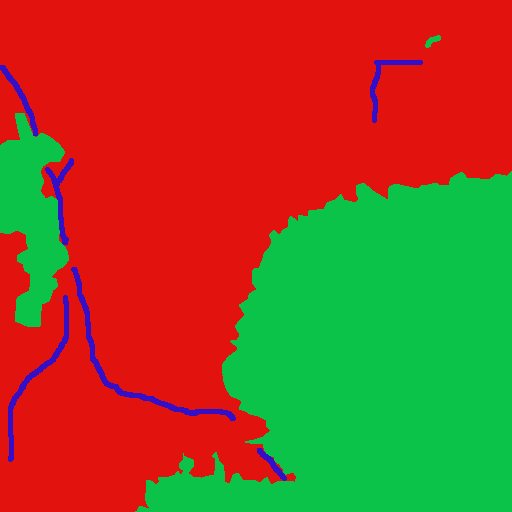

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
x_test_img=cv2.imread('/content/data_shaffled_8_04_2021/images/1.png')
y_test_img=cv2.imread('/content/data_shaffled_8_04_2021/masks/1.png')
cv2_imshow(x_test_img)
cv2_imshow(y_test_img)

In [ ]:
x_test_img.shape

(512, 512, 3)

## Prepare paths of input images and target segmentation masks

In [ ]:
import os

input_dir = "/content/data_shaffled_8_04_2021/images/"
target_dir = "/content/data_shaffled_8_04_2021/masks/"
img_size = (224, 224)
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 322
/content/data_shaffled_8_04_2021/images/1.png | /content/data_shaffled_8_04_2021/masks/1.png
/content/data_shaffled_8_04_2021/images/10.png | /content/data_shaffled_8_04_2021/masks/10.png
/content/data_shaffled_8_04_2021/images/100.png | /content/data_shaffled_8_04_2021/masks/100.png
/content/data_shaffled_8_04_2021/images/100_IvanoFrank.png | /content/data_shaffled_8_04_2021/masks/100_IvanoFrank.png
/content/data_shaffled_8_04_2021/images/101.png | /content/data_shaffled_8_04_2021/masks/101.png
/content/data_shaffled_8_04_2021/images/101_IvanoFrank.png | /content/data_shaffled_8_04_2021/masks/101_IvanoFrank.png
/content/data_shaffled_8_04_2021/images/102.png | /content/data_shaffled_8_04_2021/masks/102.png
/content/data_shaffled_8_04_2021/images/102_IvanoFrank.png | /content/data_shaffled_8_04_2021/masks/102_IvanoFrank.png
/content/data_shaffled_8_04_2021/images/103.png | /content/data_shaffled_8_04_2021/masks/103.png
/content/data_shaffled_8_04_2021/images/103_

In [ ]:
from tensorflow.keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
##Here change the size and number of classes
SIZE_X = 224 
SIZE_Y = 224
n_classes = 1
train_images = []
for img_path in input_img_paths:
  img = cv2.imread(img_path)
  if (img.shape[0]!=SIZE_X and img.shape[1]!=SIZE_Y):
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
  train_images.append(img)
#Train array      
train_images = np.array(train_images)
print(train_images.shape)

(322, 224, 224, 3)


In [ ]:
train_masks = [] 
for mask_path in target_img_paths:
  mask = cv2.imread(mask_path, 0)
  if (mask.shape[0]!=SIZE_X and mask.shape[1]!=SIZE_Y):   
    mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
  if (len(np.unique(mask))>0):
    xp,yp = np.where(mask==0)
    for bp in range(len(xp)):
      mask[xp[bp],yp[bp]]=46
    #print(np.unique(mask))
  train_masks.append(mask)
train_masks = np.array(train_masks)
print(train_masks.shape)
print(np.unique(train_masks))

(322, 224, 224)
[ 46  80 125]


The mask has 3 main labels:
- 125 means green area
- 80 means deforestation
- 46 means unknow object or area (river, house, etc.)

If we want to solve this problem with a Binary approach, we can generalice labes 46 and 80

(322, 224, 224)
[  0   0   0 ... 319 319 319]
[ 27  27  27 ... 123 124 124]
[164 165 166 ... 223 222 223]
[ 46  80 125]
[ 80 125] _ (322, 224, 224)


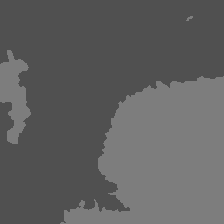

In [ ]:
if n_classes == 1:
  test_mask=train_masks
  print(test_mask.shape)
  x,y,z = np.where(test_mask == 46)
  print(x)
  print(y)
  print(z)
  print(np.unique(test_mask))
  test_mask[x,y,z] = 80
  train_masks = test_mask
  print(np.unique(train_masks),"_",train_masks.shape)
  cv2_imshow(train_masks[0])

## Data Augmentation

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import tensorflow as tf
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical")
])

In [ ]:
image_au= tf.expand_dims(train_images[0], 0)

(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>
(1, 224, 224, 3) 84.40684 <dtype: 'float32'>


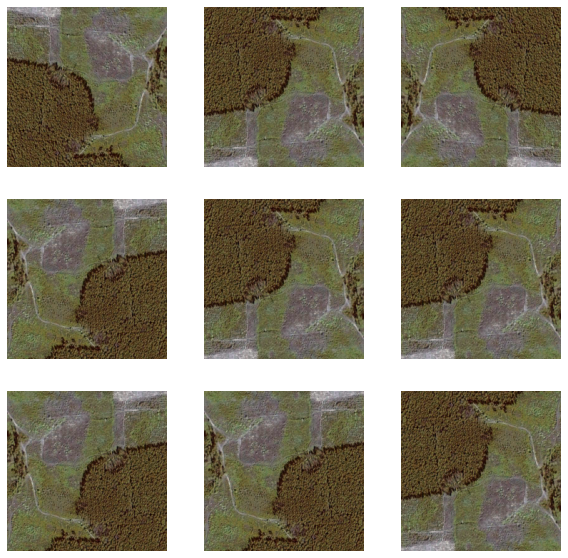

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image_au)
  print(augmented_image.shape, np.mean(augmented_image),augmented_image.dtype)
  augmented_image = np.uint8(augmented_image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
import imutils
train_images_new=[]
train_masks_new=[]
for i in range(train_images.shape[0]):
  rot=0
  train_images_new.append(train_images[i])
  train_masks_new.append(train_masks[i])
  for j in range(3):
    rot+=90
    rotated_img = train_images[i]
    rotated_img = np.rot90(rotated_img)
    #rotated_img = imutils.rotate(rotated_img, rot)
    rotated_mask = train_masks[i]
    rotated_mask = np.rot90(rotated_mask)
    #rotated_mask = imutils.rotate(rotated_mask, rot)
    train_images_new.append(rotated_img)
    train_masks_new.append(rotated_mask)
train_images = np.array(train_images_new)
train_masks = np.array(train_masks_new)
print(train_images.shape)
print(train_masks.shape)

(1288, 224, 224, 3)
(1288, 224, 224)


In [ ]:
print(np.where(train_masks==0))
print(len(np.where(train_masks==0)[0]))
print(np.unique(train_masks))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
0
[ 80 125]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)
print(np.unique(train_masks_encoded_original_shape))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1]


In [ ]:
print(train_images.shape)
#train_images = np.expand_dims(train_images, axis=3)
print(train_images.shape)
train_images = normalize(train_images, axis=1)
print(train_images.shape)

(1288, 224, 224, 3)
(1288, 224, 224, 3)
(1288, 224, 224, 3)


In [ ]:
print(train_masks_encoded_original_shape.shape)
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)
print(train_masks_input.shape)

(1288, 224, 224)
(1288, 224, 224, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)
print(f"Train: {len(x)} - {len(y)}")
print(f"Test: {len(x_test)} - {len(y_test)}")

Train: 1159 - 1159
Test: 129 - 129


In [ ]:
print("Su dataset tiene las clases ... ",np.unique(y), '  Dataset size = ',y.shape)

Su dataset tiene las clases ...  [0 1]   Dataset size =  (1159, 224, 224, 1)


In [ ]:
if n_classes != 1:
  from tensorflow.keras.utils import to_categorical
  train_masks_cat = to_categorical(y, num_classes=n_classes)
  y_train_cat = train_masks_cat.reshape((y.shape[0], y.shape[1], y.shape[2], n_classes))

  test_masks_cat = to_categorical(y_test, num_classes=n_classes)
  y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

# Model development

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

In [ ]:
def batchnorm_relu(inputs):
  x = BatchNormalization()(inputs)
  x= Activation("relu")(x)
  return x
def residual_block(inputs,num_filters, strides=1):
  x = batchnorm_relu(inputs)
  x = Conv2D(num_filters, (3,3), padding='same', strides=strides)(x)
  x = batchnorm_relu(x)
  x = Conv2D(num_filters, (3,3), padding='same', strides=1)(x)
  s = Conv2D(num_filters, (1,1), padding='same', strides=strides)(inputs)
  return x+s
def decoder_block(inputs, skip_features, num_filters):
  x = UpSampling2D((2,2))(inputs)
  x = Concatenate()([x, skip_features])
  x = residual_block(x, num_filters, strides=1)
  return x

def build_resunet(input_shape,n_class):
  """ RESUNET """
  inputs = Input(input_shape)
  """ Encoder"""
  x = Conv2D(64, (3,3), padding="same", strides=1)(inputs)
  x = batchnorm_relu(x)
  x = Conv2D(64, (3,3), padding="same", strides=1)(x)
  s = Conv2D(64, (1,1), padding="same")(inputs)
  s1 = x + s
  """ Encoder 2 y 3"""
  s2 = residual_block(s1, 128, strides=2)
  s3 = residual_block(s2, 256, strides=2)

  """ Bridge """
  b = residual_block(s3, 512, strides=2)

  """ Decoder 1, 2, 3 """
  x = decoder_block(b, s3, 256)
  x = decoder_block(x, s2, 128)
  x = decoder_block(x, s1, 64)

  """ Classifier """
  if n_class==1:
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(x)
  else:
    outputs = Conv2D(n_class, 1, padding="same", activation="softmax")(x)
  
  """ Model """
  model = Model(inputs, outputs, name="RESUNET")

  return model

In [ ]:
import numpy as np
import os
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
H=SIZE_X
W=SIZE_Y
if(False):
  print('static seed on')
  np.random.seed(42)
  tf.random.set_seed(42)

""" Hyperparameters """
batch_size = 4
num_epochs = 8
model_path = os.path.join("files", "model.h5")
csv_path = os.path.join("files", "data.csv")

In [ ]:
""" Model General ##2 """
model = build_resunet((H, W, 3),n_classes)
metrics = [dice_coef, iou, Recall(), Precision()]
lr = 1e-3
if n_classes != 1:
  #model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['accuracy',iou])
  model.compile(optimizer=Adam(lr), loss=dice_loss, metrics=metrics)
else:
  model.compile(optimizer=Adam(lr), loss='binary_crossentropy', metrics=['accuracy',iou])

model.summary()

Model: "RESUNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_13 (BatchN  (None, 224, 224, 64  256        ['conv2d_22[0][0]']              
 ormalization)                  )                                                           

## Trainning

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)

In [ ]:
history = model.fit(x, y, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(x_test, y_test), 
                    #class_weight=class_weights,
                    #callbacks=[tbCallBack],
                    shuffle=True)

Epoch 1/50
73/73 [==============================] - 89s 907ms/step - loss: 0.8918 - accuracy: 0.8917 - iou: 0.8453 - val_loss: 1.1013 - val_accuracy: 0.2166 - val_iou: 0.2517
Epoch 2/50
73/73 [==============================] - 59s 814ms/step - loss: 0.1686 - accuracy: 0.9338 - iou: 0.8839 - val_loss: 1.6254 - val_accuracy: 0.2166 - val_iou: 0.1297
Epoch 3/50
73/73 [==============================] - 59s 815ms/step - loss: 0.1712 - accuracy: 0.9343 - iou: 0.8835 - val_loss: 2.5046 - val_accuracy: 0.2166 - val_iou: 0.0448
Epoch 4/50
73/73 [==============================] - 59s 812ms/step - loss: 0.1626 - accuracy: 0.9359 - iou: 0.8843 - val_loss: 2.3542 - val_accuracy: 0.2166 - val_iou: 0.0580
Epoch 5/50
73/73 [==============================] - 59s 812ms/step - loss: 0.1589 - accuracy: 0.9369 - iou: 0.8882 - val_loss: 2.6718 - val_accuracy: 0.2166 - val_iou: 0.0434
Epoch 6/50
73/73 [==============================] - 59s 811ms/step - loss: 0.1516 - accuracy: 0.9399 - iou: 0.8916 - val_loss

In [ ]:
%load_ext tensorboard

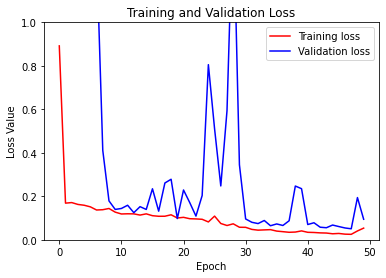

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(history.epoch, loss, 'r', label='Training loss')
plt.plot(history.epoch, val_loss, '-b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

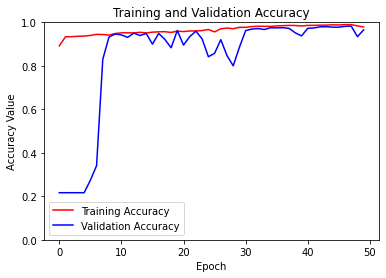

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(history.epoch, accuracy, 'r', label='Training Accuracy')
plt.plot(history.epoch, val_accuracy, '-b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

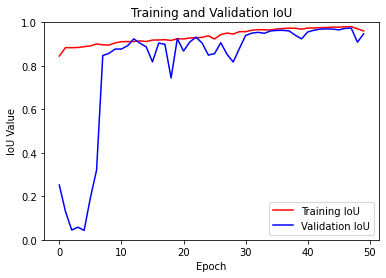

In [ ]:
giou = history.history['iou']
val_giou = history.history['val_iou']

plt.figure()
plt.plot(history.epoch, giou, 'r', label='Training IoU')
plt.plot(history.epoch, val_giou, '-b', label='Validation IoU')
plt.title('Training and Validation IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

# Saving as HDF5

In [ ]:
import datetime

In [ ]:
model.save('ResUNET-1.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
if n_classes !=1:
  model_test = load_model('ResUNET-1.hdf5', custom_objects={"iou": iou })
else:
  model_test = load_model('ResUNET-1.hdf5', custom_objects={"iou": iou })

In [ ]:
y_pred=model_test.predict(x_test)
y_pred_argmax = (y_pred[:,:,:,0] > 0.2)
y_test_argmax = (y_test[:,:,:,0] > 0.2)
prediction_other = (y_pred[:,:,:,0] > 0.2).astype(np.uint8)*255
print(np.unique(y_pred_argmax),prediction_other.shape)
print(np.unique(y_test_argmax),prediction_other.shape)

[False  True] (129, 224, 224)
[False  True] (129, 224, 224)


In [ ]:
from tensorflow.keras.metrics import MeanIoU
n = 2
IOU_keras = MeanIoU(num_classes=n)  
IOU_keras.update_state(y_pred_argmax, y_test_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.8523854


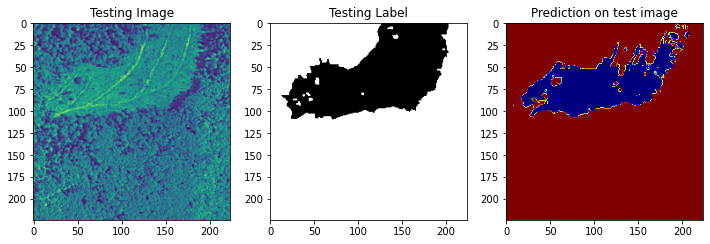

In [ ]:
import random
test_img_number = random.randint(0, len(x_test))
test_img = x_test[test_img_number]
ground_truth=y_test[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img = (prediction[:,:,:,0] > 0.2).astype(np.uint8)*255

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img[0], cmap='jet')
plt.show()

**TensorLite**

In [ ]:
import tensorflow as tf

In [ ]:
if n_classes !=1:
  model_h=tf.keras.models.load_model("/content/ResUNET-1.hdf5",custom_objects={"iou": iou })
else:
  model_h=tf.keras.models.load_model("/content/ResUNET-1.hdf5",custom_objects={"iou": iou })

In [ ]:
convert = tf.lite.TFLiteConverter.from_keras_model(model_h)
tflite_model = convert.convert()
if n_classes == 1:
  open("tflite_resunet_binary.tflite","wb").write(tflite_model)
else:
  open("tflite_resunet.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpo3jpqsmj/assets


INFO:tensorflow:Assets written to: /tmp/tmpo3jpqsmj/assets


# Test

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from time import time
from matplotlib import pyplot as plt
import os

In [ ]:
image = load_img(input_img_paths[0],grayscale=False, target_size=(224,224))
plot_img_test=cv2.imread(input_img_paths[0])
plot_img_test=cv2.cvtColor(plot_img_test,cv2.COLOR_BGR2RGB)
plot_mask_test=cv2.imread(target_img_paths[0])
plot_mask_test=cv2.cvtColor(plot_mask_test,cv2.COLOR_BGR2RGB)
image = img_to_array(image)
image = cv2.cvtColor(image,cv2.COLOR_RGBA2BGR)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print(image.shape)

from tensorflow.keras.utils import normalize
image = normalize(image, axis=1)
print(image.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [ ]:
tflite_model_path = "/content/tflite_resunet_binary.tflite"

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on input data.
input_shape = input_details[0]['shape']
print(input_shape)

# Load image
input_data = image

interpreter.set_tensor(input_details[0]['index'], input_data)

time_before=time()
interpreter.invoke()
time_after=time()
total_tflite_time = time_after - time_before
print("Model time: ", total_tflite_time)

output_data_tflite = interpreter.get_tensor(output_details[0]['index'])
print("Output: ", output_data_tflite.shape)

[  1 224 224   3]
Model time:  1.8027420043945312
Output:  (1, 224, 224, 1)


In [ ]:
if n_classes==1:
  ylite_pred_argmax=(output_data_tflite[:,:,:,0] > 0.2)
  print(ylite_pred_argmax[0].shape)
else:
  ylite_pred_argmax=np.argmax(output_data_tflite, axis=3)
  print(ylite_pred_argmax[0].shape)

(224, 224)


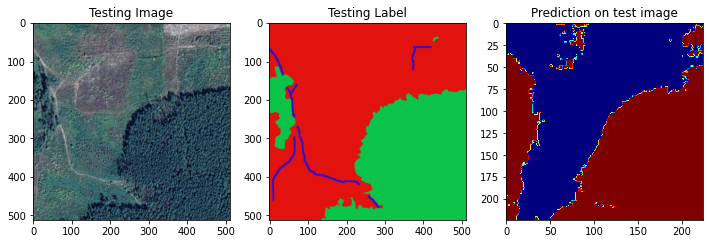

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(plot_img_test)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(plot_mask_test)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(ylite_pred_argmax[0], cmap='jet')
plt.show()

JP2 Satellite Images

In [ ]:
!pip install geopyspark
!pip install rasterio
!pip install pyspark
!pip install -q findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 57 kB/s 
     |████████████████████████████████| 199 kB 67.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=47ba0065e223fa8d961f7529b1f70113c6182daeaaad82d8df419a2b20bbeb24
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

!pip install -q findspark

In [ ]:
!geopyspark install-jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  138M  100  138M    0     0  58.4M      0  0:00:02  0:00:02 --:--:-- 76.2M


In [ ]:
import findspark
findspark.init()

In [ ]:
import rasterio
import geopyspark as gps
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
arrs_r = []
arrs_g = []
arrs_b = []
jp2s = '/content/T19LFE_20220513T143731_TCI.jp2'
with rasterio.open(jp2s) as f:
  arrs_r.append(f.read(1))
  arrs_g.append(f.read(2))
  arrs_b.append(f.read(3))
  data_r = np.array(arrs_r, dtype=arrs_r[0].dtype)
  data_g = np.array(arrs_g, dtype=arrs_g[0].dtype)
  data_b = np.array(arrs_b, dtype=arrs_b[0].dtype)
print(data_r.shape,'-',data_r.dtype)
print(data_g.shape,'-',data_g.dtype)
print(data_b.shape,'-',data_b.dtype)

(1, 10980, 10980) - uint8
(1, 10980, 10980) - uint8
(1, 10980, 10980) - uint8


In [ ]:
rgb = np.dstack((data_r[0],data_g[0],data_b[0]))
print(rgb.shape,'-',rgb.dtype)

(10980, 10980, 3) - uint8


In [ ]:
print(rgb.shape,'-', rgb.dtype)
#data_uint8 = np.uint8(data)
data_reshape = cv2.resize(rgb, (512,512))
data_reshape = cv2.cvtColor(data_reshape,cv2.COLOR_RGB2BGR)
print(data_reshape.shape,'-', data_reshape.dtype)

(10980, 10980, 3) - uint8
(512, 512, 3) - uint8


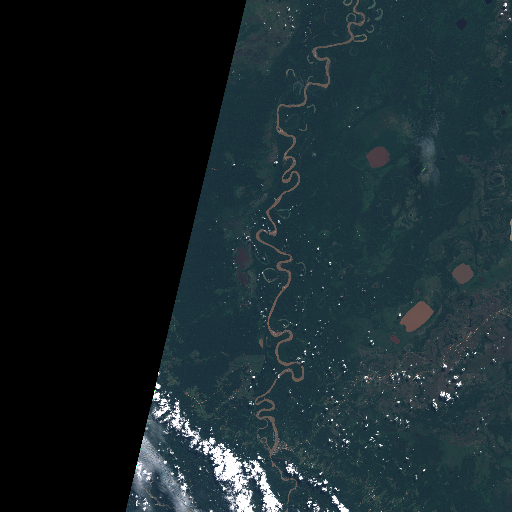

In [ ]:
cv2_imshow(data_reshape)

In [ ]:
cut_size=549
total_img=int(10980/cut_size)**2
crop=np.zeros((total_img,cut_size,cut_size,3),dtype=np.uint8)
cont=0
cont_y=0
for i in range(total_img):
  crop[i]=rgb[cont:cont+cut_size,cont_y:cont_y+cut_size]
  #print('x:',cont,'-',cont+549)
  #print('y:',cont_y,'-',cont_y+549)
  cont+=cut_size
  if(cont==10980):
    cont=0
    cont_y+=cut_size
print(crop.shape)

(400, 549, 549, 3)


In [ ]:
g_img=[]
b_img=[]
cont_ml=0
for img in crop:
  img_r = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  x,_=np.where(img_r==0)
  if cont_ml==0:
    max_low=len(x)
    cont_ml=1
  if(len(x)<max_low and len(x)>(max_low/3)):
    b_img.append(img)
  elif(len(x)<int(max_low/3000)):
  #else:
    g_img.append(img)
print('G=',len(g_img))
print('B=',len(b_img))

G= 242
B= 15


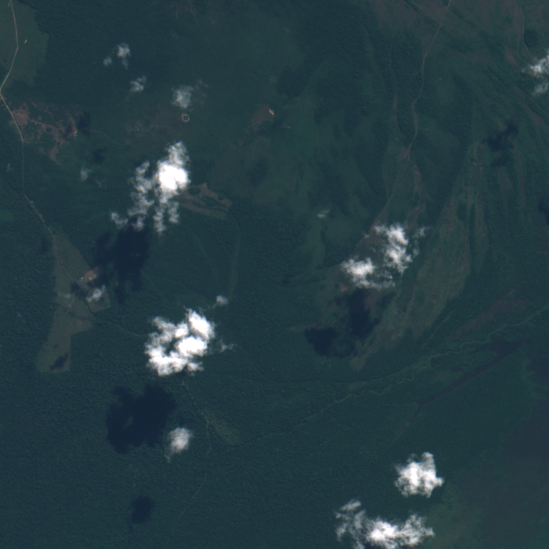

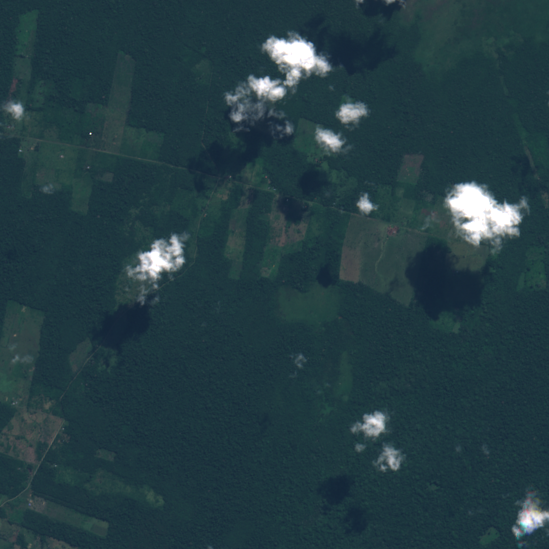

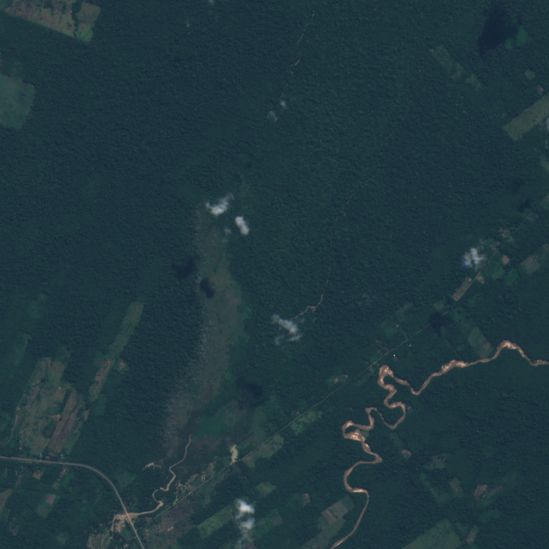

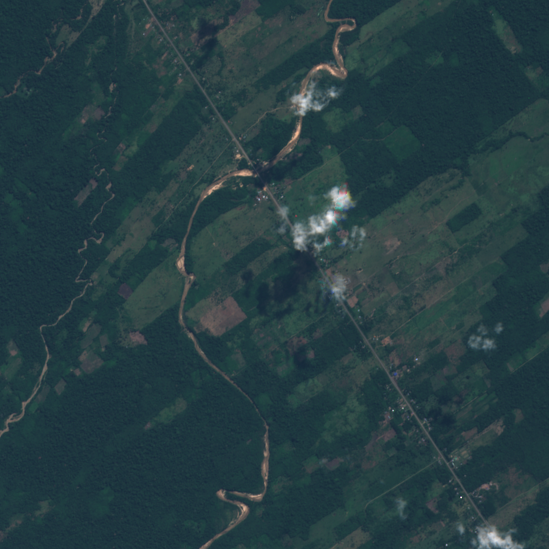

In [ ]:
for i in range(138,142):
  drtest = np.array(g_img[i])
  #drtest = cv2.resize(drtest, (100,100))
  drtest = cv2.cvtColor(drtest,cv2.COLOR_BGR2RGB)
  cv2_imshow(drtest)

(224, 224, 3) - uint8
(1, 224, 224, 3)
(1, 224, 224, 3) - float32
[  1 224 224   3]
Model time:  1.8067982196807861
Output:  (1, 224, 224, 3)
(224, 224)
[0 1 2]


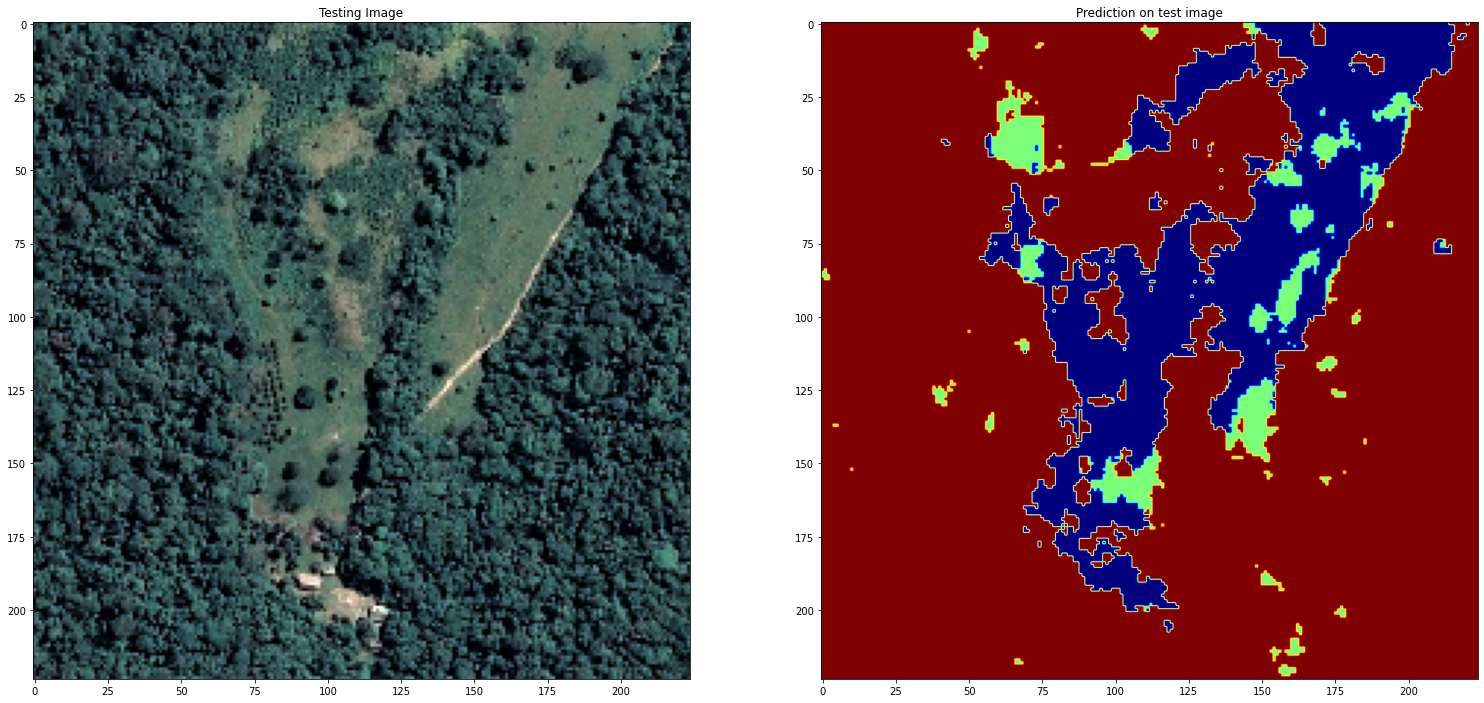

In [ ]:
image = g_img[621]
'''clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image = clahe.apply(image)'''

#image = load_img('/content/1.png',grayscale=False, target_size=(224,224))
#image = img_to_array(image)
#image = cv2.cvtColor(image,cv2.COLOR_RGBA2BGR)

plot_img_test=np.uint8(image)
print(plot_img_test.shape,'-',plot_img_test.dtype)
image = cv2.resize(image, (224,224))
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print(image.shape)

from tensorflow.keras.utils import normalize
image = normalize(image, axis=1)
image = np.float32(image)
print(image.shape,'-',image.dtype)

tflite_model_path = "/content/tflite_resunet.tflite"

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on input data.
input_shape = input_details[0]['shape']
print(input_shape)

# Load image
input_data = image

interpreter.set_tensor(input_details[0]['index'], input_data)

time_before=time()
interpreter.invoke()
time_after=time()
total_tflite_time = time_after - time_before
print("Model time: ", total_tflite_time)

output_data_tflite = interpreter.get_tensor(output_details[0]['index'])
print("Output: ", output_data_tflite.shape)

ylite_pred_argmax=np.argmax(output_data_tflite, axis=3)
print(ylite_pred_argmax[0].shape)
print(np.unique(ylite_pred_argmax[0]))

plt.figure(figsize=(40, 40))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(plot_img_test)
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(ylite_pred_argmax[0], cmap='jet')
plt.show()